## Observations and Insights 

- Capomulin was effective in reducing tumor volume in mice over the 45 day period. If a longer study was done, it would be interesting to see if the tumor was reduced completely.
- The amount of male and female mice in the study was almost equal. It would be interesting to dig into this deeper and see if the mouse's gender played a role in a drugs effectiveness at reducing tumor volume or if a certain drug was more effective for one gender versus the other. 
- Capomulin and Ramicane both seemed to be effective in reducing tumor size compared to other drugs, since the tumor volume was smaller 
- For the mice treated with Capomulin, the larger the mouse the larger the tumor volume. There was a strong positive correlation between these 2 variables. This is represented by the correlation coeffecient of 0.84.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
combined_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice in the DataFrame.
combined_mouse_data["Mouse ID"].value_counts()

g989    13
a685    10
j365    10
i557    10
p438    10
        ..
x226     1
n482     1
v199     1
l872     1
x336     1
Name: Mouse ID, Length: 249, dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_mouse_data = combined_mouse_data.set_index('Mouse ID')
mouse = combined_mouse_data.loc['g989', :]
mouse.head(13)

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_mice = combined_mouse_data.drop(index = 'g989')
clean_study_data = clean_data_mice.reset_index()
clean_study_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice in the clean DataFrame.
clean_study_data['Mouse ID'].value_counts()

a685    10
a818    10
q633    10
j365    10
i557    10
        ..
b447     1
h428     1
f932     1
t573     1
x336     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [6]:
# Generate a summary statistics table of 
#mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
average = clean_study_data['Tumor Volume (mm3)'].mean()
median = clean_study_data['Tumor Volume (mm3)'].median()
var_data = np.var(clean_study_data['Tumor Volume (mm3)'], ddof = 0)
sd_data = np.std(clean_study_data['Tumor Volume (mm3)'], ddof = 0)

drug_group_stats = clean_study_data.groupby('Drug Regimen').agg(\
          Tumor_Vol_Mean = ('Tumor Volume (mm3)', np.mean),\
          Tumor_Vol_Median=('Tumor Volume (mm3)', np.median),\
          Tumor_Vol_Var = ('Tumor Volume (mm3)', np.var),\
          Tumor_Vol_Stdev = ('Tumor Volume (mm3)', np.std),\
          Tumor_Vol_SEM = ('Tumor Volume (mm3)', st.sem)\
).round(3)

drug_group_stats

,Tumor_Vol_Mean,Tumor_Vol_Median,Tumor_Vol_Var,Tumor_Vol_Stdev,Tumor_Vol_SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


## Bar Plots

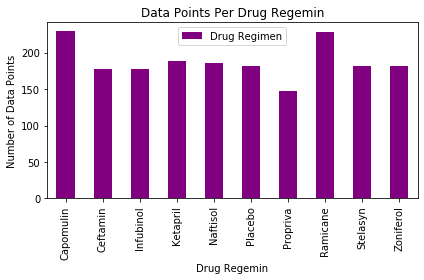

In [7]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout 
#the course of the study using pandas. 
drug_group = clean_study_data.groupby('Drug Regimen')

drug_group_count = pd.DataFrame(drug_group['Drug Regimen'].count())

count_chart = drug_group_count.plot(kind='bar', title="Data Points Per Drug Regemin", color="purple")

count_chart.set_xlabel("Drug Regemin")
count_chart.set_ylabel("Number of Data Points")
plt.tight_layout()
plt.savefig("PandaBarChart.png")
plt.show()


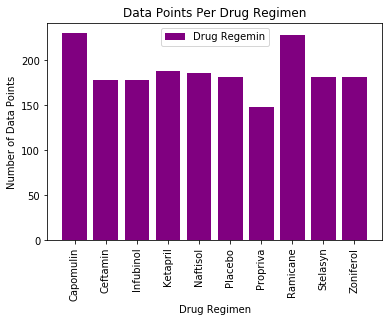

In [8]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout 
#the course of the study using pyplot.
x_axis = np.arange(len(drug_group_count))
tick_locations = [value for value in x_axis]

plt.bar(x_axis, drug_group_count['Drug Regimen'], color = "purple", align = "center")
plt.xticks(tick_locations, list(drug_group_count.index), rotation='vertical')

plt.title("Data Points Per Drug Regimen")
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')

column_name = ['Drug Regemin']
plt.legend(column_name,loc='best')

plt.savefig('PyPlotBarChart.png')
plt.show()

## Pie Plots

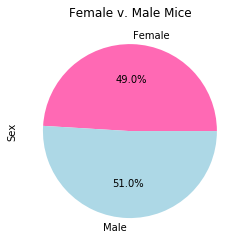

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = clean_study_data.groupby('Sex')
gender_group_count = pd.DataFrame(gender_group['Sex'].count())

gender_group_count.plot(kind = 'pie', y = 'Sex',\
                      title = "Female v. Male Mice",\
                      colors = ['hotpink', 'lightblue'],\
                       legend=False,\
                       autopct='%1.1f%%')
plt.savefig('PandaPieChart.png')
plt.show()

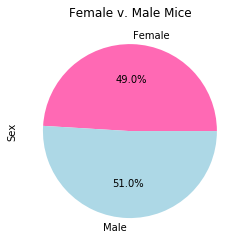

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = list(gender_group_count.index.values)

gender_counts = gender_group_count['Sex']

colors = ['hotpink','lightblue']

plt.pie(gender_counts, labels = genders, colors=colors, autopct='%1.1f%%')
plt.title('Female v. Male Mice')
plt.ylabel('Sex')

plt.savefig('PyplotPieChart.png')
plt.show()

## Quartiles, Outliers and Boxplots

In [11]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 

four_drug_list = ['Capomulin','Ramicane','Infubinol','Ceftamin']

four_drugs = clean_study_data[clean_study_data['Drug Regimen'].isin(four_drug_list)]

four_last_tumor = four_drugs.groupby(['Drug Regimen','Mouse ID']).agg(\
        Last_tumor_size=('Tumor Volume (mm3)',lambda x: x.iloc[-1])).round(3)

four_last_tumor

Last_tumor_size
Drug Regimen Mouse ID                 
Capomulin    b128               38.983
             b742               38.940
             f966               30.486
             g288               37.074
             g316               40.159
...                                ...
Ramicane     s508               30.276
             u196               40.668
             w678               43.166
             y449               44.183
             z578               30.639

[100 rows x 1 columns]

In [12]:
# Reshape dataframe with Drug Regimen as columns by using unstack, also move Last_tumor_size to index using stack
four_last_tumor_unstack = four_last_tumor.stack(level=0).unstack(level=0)
# View the result to confirm transpose
four_last_tumor_unstack.head()

,Drug Regimen,Capomulin,Ceftamin,Infubinol,Ramicane
Mouse ID,,,,,
a203,Last_tumor_size,NaN,NaN,67.973,NaN
a251,Last_tumor_size,NaN,NaN,65.526,NaN
a275,Last_tumor_size,NaN,62.999,NaN,NaN
a411,Last_tumor_size,NaN,NaN,NaN,38.408
a444,Last_tumor_size,NaN,NaN,NaN,43.048


In [13]:
#Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Set counter to 0 which is used to only print dividing line at top of output

counter = 0

# Do quartile calculations for each drug
for drug in four_drug_list:
    quartiles = four_last_tumor_unstack[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    
    # Check if it is the first time through the for loop, if so then print dividing line at top only
    if counter == 0:
        print(f"--------------------------------------------------------")
    print(f"{drug} IQR data is: {iqr}")
    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr}")
    print(f"The the median of {drug} is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} for {drug} could be outliers.")
    print(f"Values above {upper_bound} for {drug} could be outliers.")
    print(f"--------------------------------------------------------")
    counter += 1



--------------------------------------------------------
Capomulin IQR data is: 7.78
The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: 7.78
The the median of Capomulin is: 38.12 
Values below 20.71 for Capomulin could be outliers.
Values above 51.83 for Capomulin could be outliers.
--------------------------------------------------------
Ramicane IQR data is: 9.1
The lower quartile of Ramicane is: 31.56
The upper quartile of Ramicane is: 40.66
The interquartile range of Ramicane is: 9.1
The the median of Ramicane is: 36.56 
Values below 17.91 for Ramicane could be outliers.
Values above 54.31 for Ramicane could be outliers.
--------------------------------------------------------
Infubinol IQR data is: 11.48
The lower quartile of Infubinol is: 54.05
The upper quartile of Infubinol is: 65.53
The interquartile range of Infubinol is: 11.48
The the median of Infubinol is: 60.16 
Values below 36.83 for Infubinol coul

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxplot_list = []

for drug in four_drug_list:
    boxplot_list.append(list(four_last_tumor_unstack[drug].dropna()))

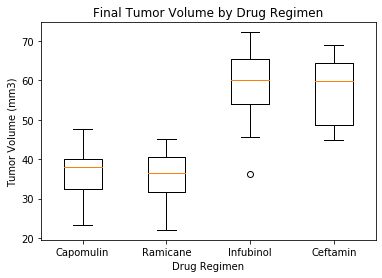

In [15]:
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume by Drug Regimen')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(boxplot_list)
plt.xticks([1,2,3,4], four_drug_list)
plt.savefig('BoxPlot')
plt.show()

## Line and Scatter Plots

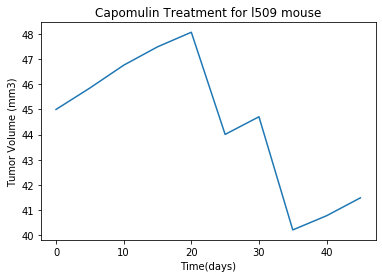

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_data = clean_study_data.loc[clean_study_data['Drug Regimen'] == 'Capomulin']
capomulin_data_mouse = capomulin_data.loc[clean_study_data['Mouse ID'] == 'l509']
#capomulin_data

cap_time_tumor = capomulin_data_mouse.groupby(['Timepoint']).agg(\
        Tumor_Vol_Mean=('Tumor Volume (mm3)', np.mean),\
).round(3)

#cap_time_tumor.head(10)
time_series = list(cap_time_tumor.index.values)
plt.plot(time_series, cap_time_tumor['Tumor_Vol_Mean'], label='Capomulin Treatment')

plt.title('Capomulin Treatment for l509 mouse')
plt.xlabel('Time(days)')
plt.ylabel('Tumor Volume (mm3)')
plt.savefig('LinePlot')

#Line plot with timepoint as x-axis and tumor volume as y-axis for specific mouse id

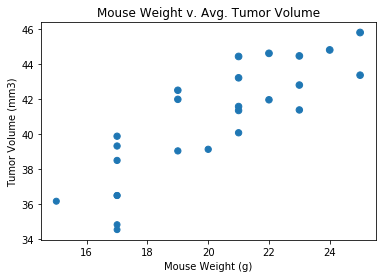

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_mouse_id = capomulin_data.groupby(['Mouse ID']).agg(\
    mouse_weight = ('Weight (g)', np.mean),\
    Tumor_vol_mean = ('Tumor Volume (mm3)', np.mean)\

                                                       ).round(3)
plt.scatter(
    cap_mouse_id['mouse_weight'],
    cap_mouse_id['Tumor_vol_mean'],
    marker='o',
    s=cap_mouse_id['Tumor_vol_mean'])
plt.title("Mouse Weight v. Avg. Tumor Volume")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.savefig('ScatterWeightVolTumor')
plt.show()

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(cap_mouse_id['mouse_weight'], cap_mouse_id['Tumor_vol_mean'])
print(f'The correlation between both factors is {round(correlation[0],2)}')

The correlation between both factors is 0.84


The r-squared is: 0.8419461020261084
The equation of the regression line is: y = 0.95 x + 21.55


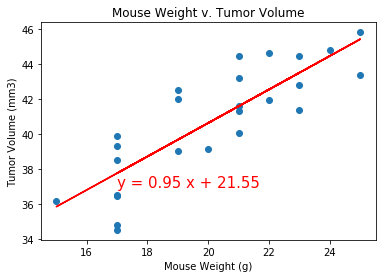

In [19]:
x_values = cap_mouse_id['mouse_weight']
y_values = cap_mouse_id['Tumor_vol_mean']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {str(round(slope,2))} x + {str(round(intercept,2))}'
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq, (17,37),fontsize=15, color='red')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mouse Weight v. Tumor Volume')

print(f'The r-squared is: {rvalue}')
print(f'The equation of the regression line is: {line_eq}')
plt.savefig('ScatterWeightvTumorVolumeRegression')
plt.show()
